In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from catboost import CatBoostClassifier
from catboost.utils import get_gpu_device_count

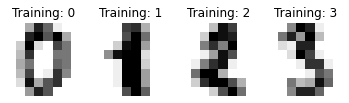

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [5]:
data[2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [6]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.25, shuffle=False)

In [9]:
model = CatBoostClassifier(
    iterations=4000, 
    early_stopping_rounds= 50,
    random_seed=42, 
    task_type="GPU" if get_gpu_device_count() > 0 else "CPU",
)
#model = CatBoostClassifier(iterations=2000,
#    random_seed=42, )

In [10]:
model.fit(X_train,y_train, verbose=False,
          plot=True, eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [11]:
model.get_best_score()

{'learn': {'MultiClass': 0.0030530106162883304},
 'validation': {'MultiClass': 0.19442952473958333}}

In [12]:
model.get_params()

{'iterations': 4000,
 'random_seed': 42,
 'task_type': 'GPU',
 'early_stopping_rounds': 50}

In [13]:
model.tree_count_

2680

In [14]:
model.evals_result_

{'learn': {'MultiClass': [2.121772703809391,
   1.9890218280206013,
   1.862605014905809,
   1.7515920796213809,
   1.649640440852357,
   1.5627849213530067,
   1.4867665631379918,
   1.4159741192812731,
   1.3576725405414811,
   1.2952417771552525,
   1.2361130746276447,
   1.184643627186572,
   1.1353987231463438,
   1.0880657102589086,
   1.0453533351023108,
   1.004486061328415,
   0.9687295190121566,
   0.9354969412641518,
   0.9026420836813289,
   0.8711817457486544,
   0.8412799566165553,
   0.8132007941548348,
   0.7857700452684205,
   0.7603712641228192,
   0.7370479954731579,
   0.7163762897584911,
   0.6967201601069506,
   0.6767137693137528,
   0.6579338815713159,
   0.6399689740221325,
   0.6233734380074935,
   0.6046738882992297,
   0.5881065816107554,
   0.5729843173632377,
   0.5563506740238725,
   0.5412494345072383,
   0.5278788837752877,
   0.5145954678655114,
   0.5019977119292873,
   0.4889440274539486,
   0.4775835588054473,
   0.4653570434298441,
   0.45478799277

In [15]:
model.feature_importances_

array([0.00000000e+00, 1.02363674e-01, 1.53722897e+00, 2.94852065e-01,
       6.54427209e-01, 1.26166814e+00, 7.95528134e-01, 6.77896280e-02,
       0.00000000e+00, 6.35287329e-01, 1.87659405e+00, 1.64132061e-01,
       4.31619434e-01, 1.63683076e+00, 1.00642827e-01, 1.73699524e-02,
       3.09674087e-03, 5.25774388e-01, 1.75915543e+00, 2.20231354e+00,
       2.09163105e+00, 1.11377451e+01, 5.56380946e-01, 5.99710761e-04,
       5.11141128e-04, 4.52352922e-01, 8.86244155e+00, 3.35367234e+00,
       5.72432870e+00, 2.50668430e+00, 2.91593239e+00, 2.36466354e-03,
       0.00000000e+00, 3.02992702e+00, 9.14716067e-01, 1.01350447e+00,
       1.81749423e+00, 1.35600100e+00, 3.45282321e+00, 0.00000000e+00,
       4.05619218e-04, 3.90637245e-01, 9.02960120e+00, 8.82975674e+00,
       3.18666287e+00, 1.05455882e+00, 6.00512783e-01, 0.00000000e+00,
       2.01843045e-04, 5.01510956e-02, 1.10264094e+00, 1.22499826e+00,
       7.69587688e-01, 1.18829399e+00, 1.41049248e+00, 1.16924336e-02,
      

In [16]:
model.learning_rate_

0.05912899971008301

In [17]:
predicted = model.predict(X_test)

In [18]:
print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier <catboost.core.CatBoostClassifier object at 0x7f106994f970>:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.93      0.89      0.91        46
           2       0.98      1.00      0.99        43
           3       0.95      0.83      0.89        47
           4       0.98      0.94      0.96        48
           5       0.92      0.98      0.95        45
           6       0.98      1.00      0.99        47
           7       0.96      0.98      0.97        45
           8       0.90      0.88      0.89        41
           9       0.84      0.93      0.88        45

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450




Confusion matrix:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  0  4]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  1  1 39  0  3  0  1  2  0]
 [ 0  0  0  0 45  0  0  0  0  3]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 44  1  0]
 [ 0  2  0  1  0  0  0  1 36  1]
 [ 1  0  0  0  0  1  0  0  1 42]]


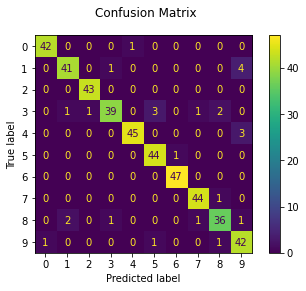

In [19]:
disp = metrics.plot_confusion_matrix(model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [20]:
path = './data'

In [21]:
import pandas as pd

In [22]:
df_train= pd.read_csv(path + '/mnist_train.csv')
df_test= pd.read_csv(path + '/mnist_test.csv')

In [23]:
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [24]:
X_test.shape, X_train.shape

((10000, 784), (60000, 784))

4


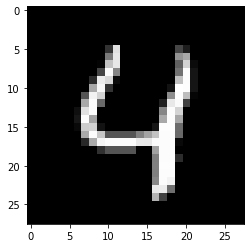

In [25]:


image = X_test.values[4].reshape((28,28))
print(y_test.values[4])
plt.imshow(image, cmap='gray')
plt.show()



In [28]:
model_mnist = CatBoostClassifier(
    iterations=1500, 
    early_stopping_rounds= 30,
    random_seed=42, 
    task_type="GPU" if get_gpu_device_count() > 0 else "CPU",
)

In [29]:
model_mnist.fit(X_train,y_train, verbose=20,
          plot=False, eval_set=(X_test, y_test))

Learning rate set to 0.13319
0:	learn: 1.8917573	test: 1.8885771	best: 1.8885771 (0)	total: 62.8ms	remaining: 1m 34s
20:	learn: 0.5223078	test: 0.5170310	best: 0.5170310 (20)	total: 981ms	remaining: 1m 9s
40:	learn: 0.3060717	test: 0.3042069	best: 0.3042069 (40)	total: 1.81s	remaining: 1m 4s
60:	learn: 0.2220736	test: 0.2264628	best: 0.2264628 (60)	total: 2.61s	remaining: 1m 1s
80:	learn: 0.1829158	test: 0.1910938	best: 0.1910938 (80)	total: 3.35s	remaining: 58.7s
100:	learn: 0.1583340	test: 0.1695475	best: 0.1695475 (100)	total: 4.02s	remaining: 55.7s
120:	learn: 0.1478803	test: 0.1598660	best: 0.1598660 (120)	total: 4.59s	remaining: 52.3s
140:	learn: 0.1400591	test: 0.1528739	best: 0.1528739 (140)	total: 5.2s	remaining: 50.1s
160:	learn: 0.1352701	test: 0.1488272	best: 0.1488272 (160)	total: 5.75s	remaining: 47.8s
180:	learn: 0.1298305	test: 0.1438291	best: 0.1438291 (180)	total: 6.29s	remaining: 45.9s
200:	learn: 0.1265395	test: 0.1412517	best: 0.1412517 (200)	total: 6.82s	remaining

In [30]:
model_mnist.tree_count_

1496

In [31]:
predicted = model_mnist.predict(X_test)

In [32]:
print(f"Classification report for classifier {model_mnist}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier <catboost.core.CatBoostClassifier object at 0x7f10581ecd30>:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000




In [33]:
predicted[11]

array([6])

0


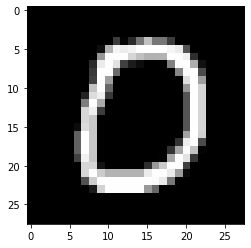

In [34]:
image = X_test.values[10].reshape((28,28))
print(y_test.values[10])
plt.imshow(image, cmap='gray')
plt.show()

In [35]:
feature_importances = model_mnist.get_feature_importance()
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

6x16: 2.008939595532633
14x12: 1.7359287028936259
16x9: 1.4041640312695798
20x10: 1.3186704554595914
21x9: 1.2857811041282674
14x18: 1.2471339556861987
17x14: 1.1548324692798078
15x18: 1.137765319070151
8x15: 1.0860015088101465
18x12: 1.0815317803917945
14x15: 1.0811683960556817
20x11: 1.0661860369037413
15x14: 1.0654880702333904
13x15: 0.9697209580464314
17x13: 0.9675018570028515
22x8: 0.9589480874981627
8x16: 0.9144788019248311
11x11: 0.8754119275157306
19x11: 0.8391583694902127
24x11: 0.8277825026491498
13x12: 0.817141634010535
20x20: 0.7485268102297709
24x14: 0.7281294737018746
11x13: 0.6994076172123114
9x16: 0.6833548346483579
12x11: 0.6783610685042478
8x14: 0.6517720259960698
8x17: 0.6444619544979548
23x10: 0.6280336038183774
10x17: 0.6225477960828704
20x12: 0.6205732938729493
13x14: 0.5933355653492911
6x18: 0.592830281828371
15x15: 0.5721763835584365
15x12: 0.5720788253183572
13x10: 0.5716527445783494
14x11: 0.5648977676419458
13x19: 0.5596343413195589
14x10: 0.5514889061216468
